In [5]:
# Configure Jupyter so figures appear in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [6]:
m = UNITS.meter
s = UNITS.second
kg =UNITS.kilogram

<Unit('kilogram')>

In [104]:
t_end=1e8 * s
init=State(x=0*m,y=149600000000.0*m,z=0*m,vx=25000*m/s,vy=0*m/s, vz=-15000*m/s)
system = System(init=init, m1=1.989e30*kg, m2=5.972e24*kg, G=6.67e-11*m*m*m/kg/s/s, t_end=t_end)

,values
init,x 0 meter y 1496000...
m1,1.989e+30 kilogram
m2,5.972e+24 kilogram
G,6.67e-11 meter ** 3 / kilogram / second ** 2
t_end,100000000.0 second


In [105]:
def slope_func2(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x,y,z,vx,vy,vz = state
    unpack(system)
    velocity=Vector(vx,vy,vz)
    position=Vector(x,y,z)

    acceleration=-(G/position.mag**2)*(m1)
    dxdt=vx
    dydt=vy
    dzdt=vz
    dvxdt= acceleration*(x/position.mag)
    dvydt= acceleration*(y/position.mag)
    dvzdt=acceleration*(z/position.mag)
    

    
    return dxdt,dydt,dzdt,dvxdt,dvydt, dvzdt

In [106]:
results, details = run_ode_solver(system, slope_func2, max_step=1e5)
details

,values
sol,None
t_events,[]
nfev,6080
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


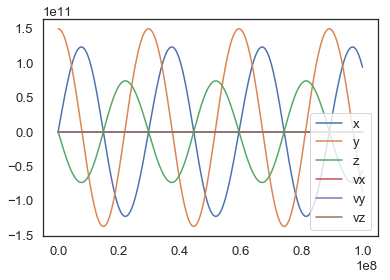

In [112]:
results.plot()

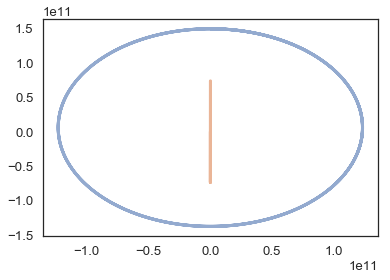

In [113]:
plot(results.x,results.y,results.z)

In [114]:
from mpl_toolkits.mplot3d import Axes3D

AttributeError: 'TimeFrame' object has no attribute 'x1'

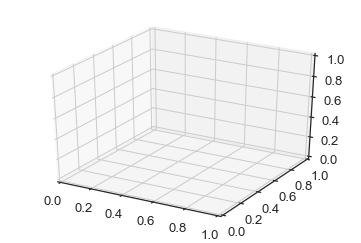

In [115]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.scatter(results.x1, results.y1, results.z1)

plt.show()
